# **Imports**

In [1]:
import pickle
import numpy as np
import random
import glob
import matplotlib.pylab as plt
import numpy as np
from PIL import Image
from sklearn.model_selection import StratifiedShuffleSplit

import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as func
from torchvision.models import resnet18
from torchvision import transforms, models
import torch.optim as optim
from torch.optim.lr_scheduler import ExponentialLR
from torch.optim.lr_scheduler import StepLR

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit
from scipy.stats import entropy
from getData import *
from trainer import *
from getModel import *


import time
# Seed for reproducibility
SEED = 25
random.seed(SEED)
torch.manual_seed(SEED)
np.random.seed(SEED)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


# **Data**

In [2]:
dataHandler = getData(0.1)

Training:  (340200, 2, 128) (340200, 2)
Validation:  (37800, 2, 128) (37800, 2)
Testing:  (42000, 2, 128) (42000, 2)


In [3]:
trainLoader, valLoader, testLoader = dataHandler.get_loaders()

# **Baseline Model**

In [4]:
bl_initialWeights = "./models/intialized_bl_0420.pth"
blNet = blModel().to(device)
blNet.load_state_dict(torch.load(bl_initialWeights))
optimizer_bl = optim.Adam(blNet.parameters(), lr=0.0001, weight_decay=5e-4)
criterion_bl = nn.CrossEntropyLoss()
NUM_EPOCHS = 50

In [5]:
BL = blHandler(blNet, criterion_bl, optimizer_bl, device, num_epochs=NUM_EPOCHS, bestPath="./models/testBest_bl_0424.pth")
blNet, blHistory = BL.train(trainLoader, valLoader)
blNet.load_state_dict(torch.load("./models/testBest_bl_0424.pth"))

epoch 1 --> trainLoss: 1.270, trainAcc: 0.490, validLoss: 1.163, validAcc: 0.519
Model Saved!
epoch 2 --> trainLoss: 1.088, trainAcc: 0.556, validLoss: 1.040, validAcc: 0.570
Model Saved!
epoch 3 --> trainLoss: 1.041, trainAcc: 0.569, validLoss: 1.017, validAcc: 0.575
Model Saved!
epoch 4 --> trainLoss: 1.018, trainAcc: 0.575, validLoss: 1.016, validAcc: 0.576
Model Saved!
epoch 5 --> trainLoss: 1.003, trainAcc: 0.581, validLoss: 1.000, validAcc: 0.580
Model Saved!
epoch 6 --> trainLoss: 0.992, trainAcc: 0.586, validLoss: 0.994, validAcc: 0.585
Model Saved!
epoch 7 --> trainLoss: 0.984, trainAcc: 0.589, validLoss: 0.980, validAcc: 0.590
Model Saved!
epoch 8 --> trainLoss: 0.977, trainAcc: 0.592, validLoss: 0.982, validAcc: 0.588
epoch 9 --> trainLoss: 0.971, trainAcc: 0.594, validLoss: 0.993, validAcc: 0.586
epoch 10 --> trainLoss: 0.967, trainAcc: 0.596, validLoss: 0.970, validAcc: 0.594
Model Saved!
epoch 11 --> trainLoss: 0.962, trainAcc: 0.598, validLoss: 0.980, validAcc: 0.592
epo

<All keys matched successfully>

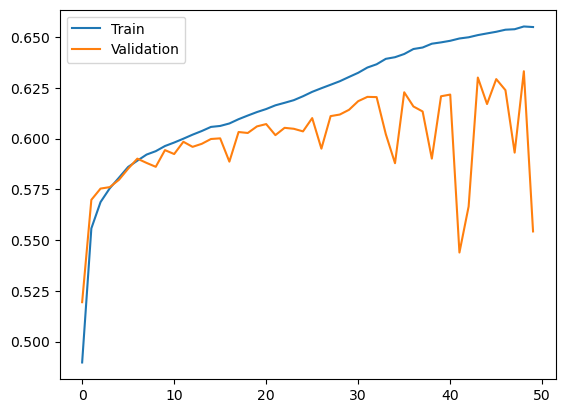

In [6]:
fig = plt.Figure()

x = [x for x in range(NUM_EPOCHS)]
plt.plot(x, blHistory["train"]["accuracy"])
plt.plot(x, blHistory["validation"]["accuracy"])
plt.legend(["Train", "Validation"])
plt.show()

# **EE Model**

In [7]:
ee_initialWeights = "./models/intialized_ee_0420.pth"
eeNet = eeModel().to(device)
eeNet.load_state_dict(torch.load(ee_initialWeights))

optimizer_ee = optim.Adam(eeNet.parameters(), lr=0.0001, weight_decay=5e-4)
criterion_ee = nn.CrossEntropyLoss()
NUM_EPOCHS = 50

In [8]:
EE = eeHandler(eeNet, criterion_ee, optimizer_ee, device, num_epochs=NUM_EPOCHS, bestPath="./models/testBest_ee_0424.pth")
eeNet, eeHistory = EE.train(trainLoader, valLoader)
eeNet.load_state_dict(torch.load("./models/testBest_ee_0424.pth"))

epoch 1 --> trainLoss: 0.998, trainAcc: 0.589, validLoss: 0.980, validAcc: 0.593
Model Saved!
epoch 2 --> trainLoss: 0.992, trainAcc: 0.591, validLoss: 0.983, validAcc: 0.590
epoch 3 --> trainLoss: 0.987, trainAcc: 0.593, validLoss: 0.976, validAcc: 0.596
Model Saved!
epoch 4 --> trainLoss: 0.982, trainAcc: 0.595, validLoss: 0.990, validAcc: 0.592
epoch 5 --> trainLoss: 0.980, trainAcc: 0.596, validLoss: 0.976, validAcc: 0.598
epoch 6 --> trainLoss: 0.975, trainAcc: 0.598, validLoss: 0.990, validAcc: 0.592
epoch 7 --> trainLoss: 0.972, trainAcc: 0.600, validLoss: 0.992, validAcc: 0.595
epoch 8 --> trainLoss: 0.970, trainAcc: 0.600, validLoss: 0.967, validAcc: 0.603
Model Saved!
epoch 9 --> trainLoss: 0.967, trainAcc: 0.602, validLoss: 0.971, validAcc: 0.599
epoch 10 --> trainLoss: 0.964, trainAcc: 0.603, validLoss: 0.968, validAcc: 0.599
epoch 11 --> trainLoss: 0.962, trainAcc: 0.604, validLoss: 1.005, validAcc: 0.594
epoch 12 --> trainLoss: 0.959, trainAcc: 0.605, validLoss: 0.974, va

<All keys matched successfully>

In [9]:
eeRecorder, preds, acc = EE.infer(valLoader, threshold=0.05, verbose=False)
EE.testingSummary(eeRecorder, nBranches=2, overall=True)

Summary
Branch 1: Accuracy 99.98% with 26.93% of the samples
Branch 2: Accuracy 49.61% with 73.07% of the samples
Overall Weighted Accuracy: 63.17%


In [10]:
eeRecorder, preds, acc = EE.infer(valLoader, threshold=0.1)
EE.testingSummary(eeRecorder, nBranches=2, overall=True)

Summary
Branch 1: Accuracy 99.60% with 30.72% of the samples
Branch 2: Accuracy 47.03% with 69.28% of the samples
Overall Weighted Accuracy: 63.17%


# SNR Plots

In [15]:
snrs = dataHandler.get_snrs()
trainXs, valXs, testXs = dataHandler.get_Xs()
trainLabels, valLabels, testLabels = dataHandler.get_labels()

label_dict = dataHandler.get_label_dict()
stringSNRs = ['{}'.format(x) for x in snrs]
accuracies = {t:{x:{y: 0 for y in stringSNRs} for x in ['train', 'val', 'test']} for t in ["Baseline", "EE"]}

nBranches = 2
inferenceCounter = {x: {snr: 0 for snr in stringSNRs} for x in range(nBranches)}

In [16]:
# Getting TRAIN data with differebt SNRs values in dB
for snr in stringSNRs:
    
    tmpData = np.array([trainXs[i] for i in range(len(trainLabels)) if trainLabels[i][1]==snr])
    tmpLabels = np.array([trainLabels[i][0] for i in range(len(trainLabels)) if trainLabels[i][1]==snr])

    label_val = list(map(lambda x: tmpLabels[x], range(len(tmpLabels))))
    tmpLabels = np.array((list(map(lambda x: label_dict[x], label_val))))
    tmpSet = {'data': torch.tensor(tmpData).float(), 'labels': torch.tensor(tmpLabels).float()}

    tmpLoader = DataLoader(myDataset(tmpSet), batch_size= 25, shuffle = True, num_workers= 0)
    

    bl_Loss, bl_Acc = 0, 0
    
    with torch.no_grad():
            blNet.eval()
            for data, labels in tmpLoader:
                data, labels = data.to(device), labels.to(device)
                # Long
                outputs = blNet(data)
                _, preds = torch.max(outputs, 1)
                loss = criterion_bl(outputs, labels.long())
                bl_Loss += loss.item()
                bl_Acc += accuracy_score(labels.detach().cpu().numpy(), preds.detach().cpu().numpy())
                
                
            bl_Loss = bl_Loss/len(tmpLoader)            
            bl_Acc = bl_Acc/len(tmpLoader)
            
            accuracies["Baseline"]['train'][snr] = bl_Acc
            accuracies["Baseline"]['train'][snr] = bl_Acc
    # Early Exiting
    recorder, _, eeAcc = EE.infer(tmpLoader, threshold=0.05)
    accuracies["EE"]['train'][snr] = eeAcc
    
    for i in range(nBranches):
        inferenceCounter[i][snr] = len(recorder[i]) 

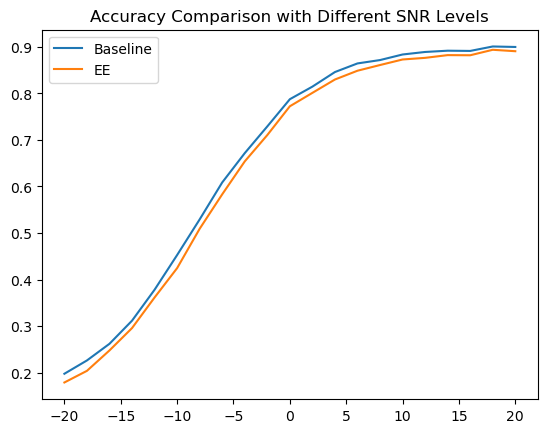

In [17]:
fig = plt.Figure()

xAxis = np.arange(-20, 21, 2) #SNRs
plt.plot(xAxis, list(accuracies["Baseline"]["train"].values()));
plt.plot(xAxis, list(accuracies["EE"]["train"].values()));
plt.legend(["Baseline", "EE"])
plt.title("Accuracy Comparison with Different SNR Levels");
plt.show()

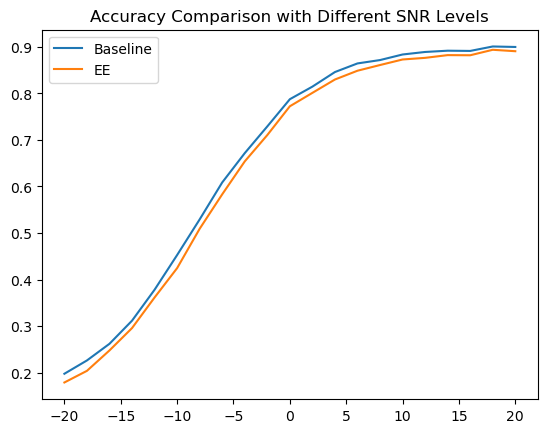

In [13]:
fig = plt.Figure()

xAxis = np.arange(-20, 21, 2) #SNRs
plt.plot(xAxis, list(accuracies["Baseline"]["train"].values()));
plt.plot(xAxis, list(accuracies["EE"]["train"].values()));
plt.legend(["Baseline", "EE"])
plt.title("Accuracy Comparison with Different SNR Levels");
plt.show()

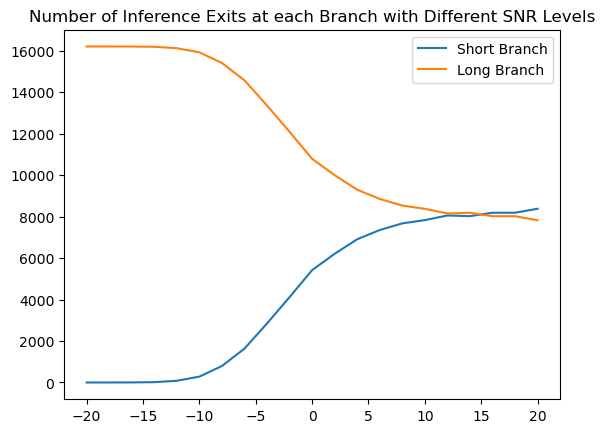

In [18]:
fig = plt.Figure()

xAxis = np.arange(-20, 21, 2) #SNRs
plt.plot(xAxis, list(inferenceCounter[0].values()))
plt.plot(xAxis, list(inferenceCounter[1].values()))
plt.legend(["Short Branch", "Long Branch"])
plt.title("Number of Inference Exits at each Branch with Different SNR Levels");
plt.show()

# Experiments

## 1. Moving the branching more forward! [Closer to the main branch]